# **Acidentes nas rodovias brasileiras**

É importante obter um detalhamento dos acidentes nas rodovias brasileiras. O conhecimento dessa questão pode auxiliar em novas medidas de prevenção/conscientização, bem como de fiscalização nas estradas.

Além disso, se você comanda uma empresa, provavelmente terá pessoas dirigindo veículos, mesmo que você não opere em caminhões ou nichos de transporte. Repetidamente, os funcionários terão que fazer viagens, sair para encontrar clientes ou por qualquer outro motivo. Embora dirigir o veículo da empresa traga várias vantagens para os funcionários, sempre há um risco envolvido. Podem envolver-se em acidentes, ora por culpa própria e ora por negligência de outros condutores. Qualquer que seja o motivo do acidente, você pode entrar em uma situação difícil como proprietário do veículo.

Diante desta situação, é bom estar ciente dos motivos reais que ocasionam os acidentes com veículos da empresa por seus funcionários, para que você possa lidar com o impacto real desta situação nos rendimentos da empresa.

Acidentes podem gerar pagamento de indenizações para os funcionários, reparo ou perca total do veículo acidentado, dentre outras situações que podem influenciar diretamente na empresa.

## **Análise de dados**

Para entender melhor essa questão, foi utilizado um conjunto de dados obtidos na página de dados abertos do Brasil, que detalha informações sobre os acidentes entre janeiro e março do ano de 2019.

In [1]:
# importando bibliotecas úteis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# lendo o dataset e analisando as informações contidas no mesmo

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/acidentes_brasil.csv', sep = ';', encoding='latin-1')
df.head(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,182210.0,2019-01-01,3,01:30:00,SP,116.0,218,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Múltipla,Curva,Sim,4,0,4,0,0,0,4,1,-23.46052,-46.487725,SR-SP,DEL6/1,UOP01/SP
1,182211.0,2019-01-01,3,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-25.05534,-50.227768,SR-PR,DEL7/3,UOP01/PR
2,182212.0,2019-01-01,3,00:45:00,SC,101.0,16,GARUVA,Animais na Pista,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-26.12160,-48.882600,SR-SC,DEL8/3,UOP01/SC
3,182214.0,2019-01-01,3,00:00:00,CE,20.0,"429,5",FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Viaduto,Sim,1,0,0,1,0,0,1,1,-3.76999,-38.670063,SR-CE,DEL16/1,UOP02/CE
4,182215.0,2019-01-01,3,01:00:00,MG,381.0,327,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Interseção de vias,Não,2,0,0,1,1,0,1,2,-19.76090,-43.030600,SR-MG,DEL4/3,UOP01/MG


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15588 entries, 0 to 15587
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      15588 non-null  float64
 1   data_inversa            15588 non-null  object 
 2   dia_semana              15588 non-null  int64  
 3   horario                 15588 non-null  object 
 4   uf                      15588 non-null  object 
 5   br                      15575 non-null  float64
 6   km                      15575 non-null  object 
 7   municipio               15588 non-null  object 
 8   causa_acidente          15588 non-null  object 
 9   tipo_acidente           15588 non-null  object 
 10  classificacao_acidente  15588 non-null  object 
 11  fase_dia                15588 non-null  object 
 12  sentido_via             15588 non-null  object 
 13  condicao_metereologica  15588 non-null  object 
 14  tipo_pista              15588 non-null

Através deste código, é notório que o dataset possui uma boa quantidade de dados e possui poucas instâncias com problemas.

In [5]:
# removendo algumas colunas que não serão úteis nesta primeira análise

df = df.drop(columns = ['latitude', 'longitude', 'regional', 'delegacia', 'uop', 'ignorados', 'uso_solo', 'sentido_via',
                        'classificacao_acidente', 'id'])

In [6]:
# retirando os dados ausentes

df = df.dropna()

Existem algumas colunas numéricas importantes e que precisam de verificação. Somando a quantidade de feridos, ilesos e mortos, deve-se ter o número de pessoas envolvidas no acidente. Portanto, aplica-se esta ideia para fazer com que os dados estejam corretos.

In [7]:
df = df[df['feridos'] + df['ilesos'] + df['mortos'] == df['pessoas']]
df.head()

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,pessoas,mortos,feridos_leves,feridos_graves,ilesos,feridos,veiculos
0,2019-01-01,3,01:30:00,SP,116.0,218,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,Plena Noite,Céu Claro,Múltipla,Curva,4,0,4,0,0,4,1
1,2019-01-01,3,01:30:00,PR,373.0,"177,3",PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,Plena Noite,Nublado,Dupla,Reta,1,0,1,0,0,1,1
2,2019-01-01,3,00:45:00,SC,101.0,16,GARUVA,Animais na Pista,Colisão com objeto estático,Plena Noite,Céu Claro,Dupla,Reta,1,0,1,0,0,1,1
3,2019-01-01,3,00:00:00,CE,20.0,"429,5",FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,Plena Noite,Nublado,Dupla,Viaduto,1,0,0,1,0,1,1
4,2019-01-01,3,01:00:00,MG,381.0,327,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,Plena Noite,Nublado,Simples,Interseção de vias,2,0,0,1,1,1,2


Até aqui foram tratados os dados de modo que estejam consistentes. Parte-se agora para uma análise exploratória de modo a responder algumas questões importantes.

Qual os dias da semana que apresentam o maior índice de acidentes?

R: Pelo senso comum, é esperado que nos fins de semana existam os maiores índices de acidente. Observando o histograma abaixo, percebe-se que essa informação é correta. Domingo, sexta-feira e sábado (índices 1, 6 e 7, respectivamente) possuem os maiores índices de acidentes.

Pode-se pensar que na sexta-feira o índice de acidentes aumenta pois as pessoas saem para viagem e no domingo, retornam as suas casas.

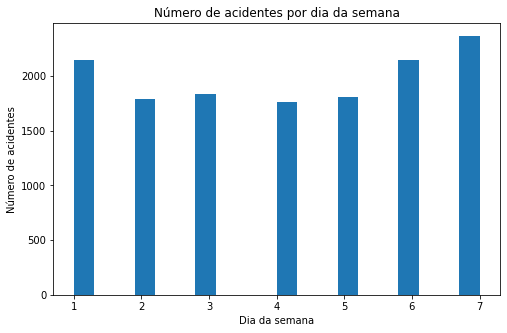

In [8]:
df['dia_semana'].plot(kind = 'hist', bins = 20, figsize =(8,5))
plt.title('Número de acidentes por dia da semana');
plt.xlabel('Dia da semana');
plt.ylabel('Número de acidentes');

A média de acidentes por semana também pode ser calculada de acordo com o código abaixo. Com este resultado, observa-se que os meses citados anteriormente possuem um índice de acidentes acima da média semanal.

In [9]:
df['dia_semana'].value_counts().mean()

1980.7142857142858

É interessante também analisar sobre os acidentes em cada tipo de rodovia. Percebe-se que a BR101 é a que gera mais acidentes, seguida da BR116, seguida ainda da BR381. Entretanto, ao analisar mais um pouco, pode-se perceber que a BR381 apesar de estar em 3º lugar entre as rodovias que mais causam acidentes, ela não está neste posto entre as que mais matam; sua posição é ultrapassada por várias outras rodovias, como por exemplo a BR153, como mostra o gráfico.

In [10]:
df['br'].value_counts()

101.0    2420
116.0    1925
381.0     723
40.0      691
153.0     557
         ... 
359.0       1
120.0       1
122.0       1
487.0       1
349.0       1
Name: br, Length: 103, dtype: int64

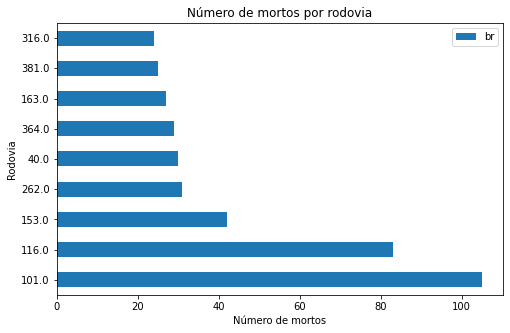

In [11]:
# criando variáveis para construir o gráfico de número de mortos por rodovia

df[df['mortos'] >= 1]['br'].value_counts()
morte_rodovia = pd.DataFrame(df[df['mortos'] >= 1]['br'].value_counts())

# plotando o gráfico

morte_rodovia[morte_rodovia['br'] > 23].plot(kind = 'barh', figsize = (8,5));
plt.title('Número de mortos por rodovia');
plt.xlabel('Número de mortos');
plt.ylabel('Rodovia');

São catalogados nos dados 3 tipos de pista: múltipla, dupla e simples. As pistas simples são aquelas mais predominantes nos estados do Brasil; aquelas na qual existe somente uma via pavimentada que possui um sentido de ida e outro de volta. A pista dupla é aquela que possui duas vias de ida e duas de volta, como em geral os trechos da BR381. Por fim, as pistas múltiplas são aquelas que existem 3 faixas.

É interessante analisar qual a quantidade de acidentes em cada tipo de pista. Para isso, temos o gráfico abaixo.

O que era de se esperar é confirmado no gráfico. As pistas simples são as que mais causam acidentes nas estradas brasileiras.

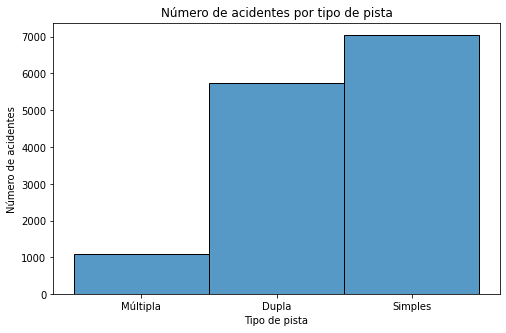

In [12]:
plt.figure(figsize = (8,5))
sns.histplot(x = 'tipo_pista', data = df);
plt.title('Número de acidentes por tipo de pista');
plt.xlabel('Tipo de pista');
plt.ylabel('Número de acidentes');

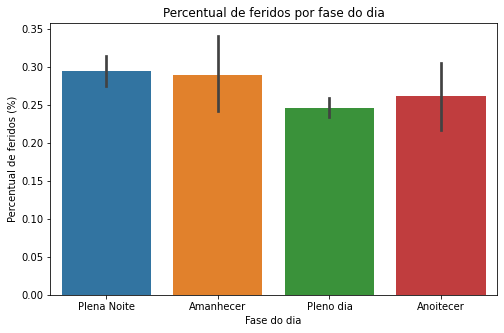

In [13]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'fase_dia', y = 'feridos_graves', data = df);
plt.title('Percentual de feridos por fase do dia');
plt.xlabel('Fase do dia');
plt.ylabel('Percentual de feridos (%)');

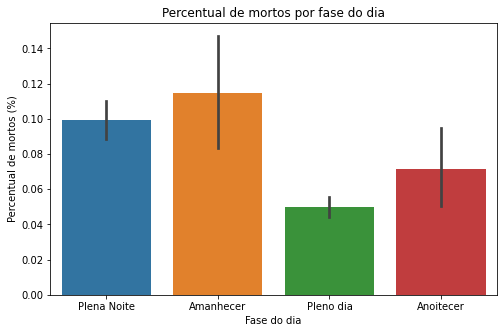

In [14]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'fase_dia', y = 'mortos', data = df);
plt.title('Percentual de mortos por fase do dia');
plt.xlabel('Fase do dia');
plt.ylabel('Percentual de mortos (%)');

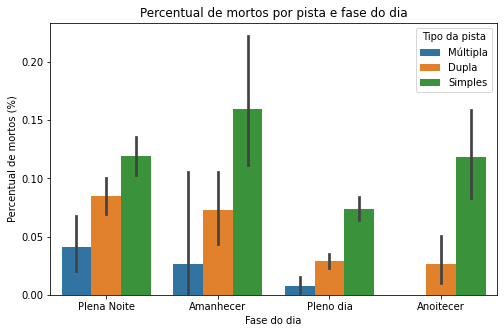

In [15]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'fase_dia', y = 'mortos', hue = 'tipo_pista', data = df);
plt.title('Percentual de mortos por pista e fase do dia');
plt.xlabel('Fase do dia');
plt.ylabel('Percentual de mortos (%)');
plt.legend(title = 'Tipo da pista');

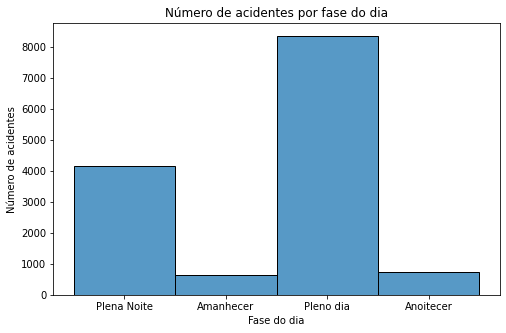

In [16]:
plt.figure(figsize = (8,5))
sns.histplot(x = 'fase_dia', data = df);
plt.title('Número de acidentes por fase do dia');
plt.xlabel('Fase do dia');
plt.ylabel('Número de acidentes');

In [17]:
df['fase_dia'].value_counts()

Pleno dia      8345
Plena Noite    4144
Anoitecer       730
Amanhecer       646
Name: fase_dia, dtype: int64

In [18]:
# causa dos acidentes nas rodovias
df['causa_acidente'].value_counts()

Falta de Atenção à Condução                                                       4997
Desobediência às normas de trânsito pelo condutor                                 1470
Velocidade Incompatível                                                           1341
Ingestão de Álcool                                                                1037
Não guardar distância de segurança                                                 904
Defeito Mecânico no Veículo                                                        837
Pista Escorregadia                                                                 588
Condutor Dormindo                                                                  587
Animais na Pista                                                                   336
Falta de Atenção do Pedestre                                                       319
Ultrapassagem Indevida                                                             243
Defeito na Via                             

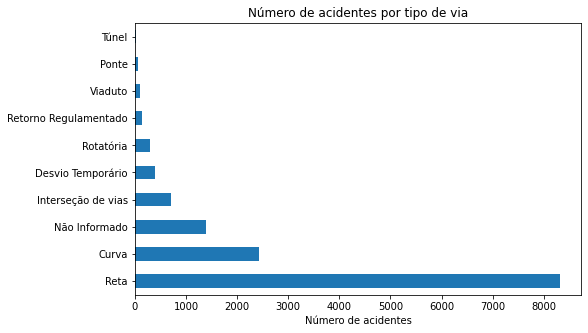

In [19]:
df['tracado_via'].value_counts().plot(kind = 'barh', figsize = (8,5));
plt.title('Número de acidentes por tipo de via');
plt.xlabel('Número de acidentes');

In [20]:
#criando um nova coluna com um novo formato de data
df['data'] = pd.to_datetime(df.data_inversa)

In [21]:
#criando novas colunas no dataset separando o dia, o mês e o ano do acidente
df['dia'] = df['data'].dt.day

In [22]:
#retirando as colunas data que não servem mais
df = df.drop(columns = ['data_inversa', 'data'])

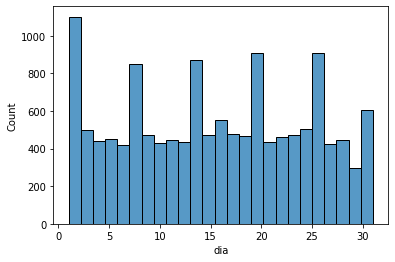

In [23]:
sns.histplot(x = 'dia', data = df);

In [24]:
df['pessoas'].mean()

# media de pessoas dentro dos veiculos

2.378146411828345

In [25]:
df['feridos_leves'].mean()

# media de feridos leves

0.9571583122971511

In [26]:
taxa_morte = (df['mortos'].sum() / df['pessoas'].sum())*100
taxa_leves = (df['feridos_leves'].sum() / df['pessoas'].sum())*100
taxa_ilesas = (df['ilesos'].sum() / df['pessoas'].sum())*100
taxa_graves= (df['feridos_graves'].sum() / df['pessoas'].sum())*100

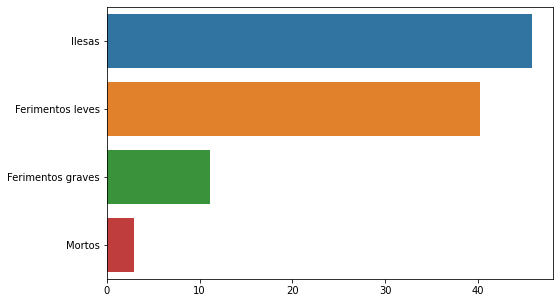

In [27]:
plt.figure(figsize = (8,5))
sns.barplot(y = ['Ilesas', 'Ferimentos leves', 'Ferimentos graves', 'Mortos'], x = [taxa_ilesas, taxa_leves, taxa_graves, taxa_morte]);

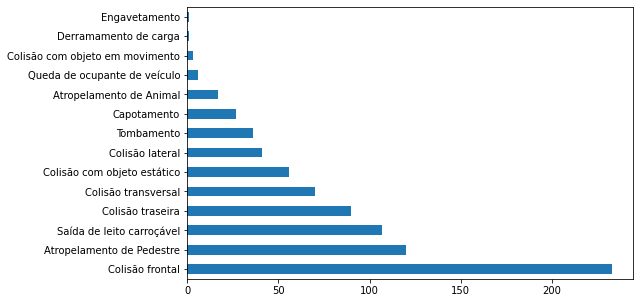

In [28]:
df[df['mortos'] >= 1]['tipo_acidente'].value_counts().plot(kind = 'barh', figsize = (8,5));

#as colisões frontais são as maiores causadoras de mortes

In [29]:
df[df['mortos'] >= 1]['tipo_pista'].value_counts()


Simples     547
Dupla       243
Múltipla     18
Name: tipo_pista, dtype: int64

In [30]:
df[df['ilesos'] >= 1]['tipo_acidente'].value_counts()

#das pessoas que sairam ilesas, as colisões traseira, transversal e lateral são as que mais contribuem; ou seja, falta de atenção

Colisão traseira                   2413
Colisão transversal                1541
Colisão lateral                    1521
Saída de leito carroçável           941
Colisão frontal                     688
Colisão com objeto estático         434
Atropelamento de Pedestre           414
Tombamento                          336
Capotamento                         220
Incêndio                            207
Engavetamento                       194
Queda de ocupante de veículo        106
Atropelamento de Animal             100
Derramamento de carga                44
Colisão com objeto em movimento      42
Danos eventuais                      23
Name: tipo_acidente, dtype: int64

In [31]:
df[df['mortos'] >= 1]['br'].value_counts()

#br101 é a que mais mata

101.0    105
116.0     83
153.0     42
262.0     31
40.0      30
        ... 
468.0      1
472.0      1
432.0      1
408.0      1
420.0      1
Name: br, Length: 74, dtype: int64

In [32]:
df[df['mortos'] >= 1]['dia_semana'].value_counts()

7    160
1    150
6    130
5    108
2     91
3     86
4     83
Name: dia_semana, dtype: int64

In [33]:
df[df['mortos'] >= 1]['causa_acidente'].value_counts()

Falta de Atenção à Condução                                                       206
Desobediência às normas de trânsito pelo condutor                                 120
Velocidade Incompatível                                                           110
Falta de Atenção do Pedestre                                                       85
Condutor Dormindo                                                                  54
Ingestão de Álcool                                                                 53
Ultrapassagem Indevida                                                             45
Mal Súbito                                                                         19
Pista Escorregadia                                                                 18
Desobediência às normas de trânsito pelo pedestre                                  17
Animais na Pista                                                                   16
Não guardar distância de segurança                    

In [34]:
# número de colisões frontais registradas

df[df['tipo_acidente'] == 'Colisão frontal']['tipo_acidente'].value_counts()

# numero de mortos registrados

df['mortos'].sum()

951

In [35]:
(df[df['tipo_acidente'] == 'Colisão frontal']['tipo_acidente'].value_counts() / df['mortos'].sum() ) * 100

Colisão frontal    94.742376
Name: tipo_acidente, dtype: float64

In [36]:
# causas dos acidentes com 1 veiculo e total de acidentes com 1 veiculo

acdsozinho = pd.DataFrame(df[df['veiculos'] == 1]['tipo_acidente'].value_counts())
total_acdsozinho = df[df['veiculos'] == 1]['tipo_acidente'].value_counts().sum()

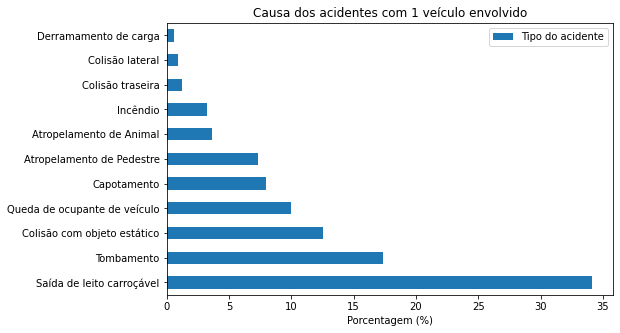

In [37]:
# maiores causas dos acidentes com apenas 1 veículo

((acdsozinho[acdsozinho['tipo_acidente'] > 30] / total_acdsozinho ) * 100).plot(kind = 'barh', figsize = (8,5));
plt.legend(['Tipo do acidente']);
plt.title('Causa dos acidentes com 1 veículo envolvido');
plt.xlabel('Porcentagem (%)');

In [38]:
# mudando o tipo da coluna para trabalhar com horas

df['hora'] = pd.to_datetime(df.horario)

# definindo uma nova coluna representando o horário do acidente

df['horario_acidente'] = df['hora'].dt.hour

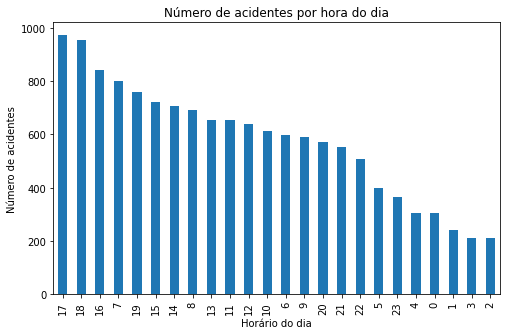

In [39]:
df['horario_acidente'].value_counts().plot(kind = 'bar', figsize = (8, 5));
plt.title('Número de acidentes por hora do dia');
plt.xlabel('Horário do dia');
plt.ylabel('Número de acidentes');

Após a análise exploratória dos dados, foram obtidas diversas conclusões em relação a fase do dia:

1. O percentual de feridos não é significativamente alterado de acordo com a fase do dia em que ocorre o acidente;

2. O percentual de mortos durante a noite é maior do que o percentual de mortos durante o dia.; isso pode estar relacionado com a visibilidade e também com o estado físico dos motoristas.

3. Apesar do número de mortos ser maior a noite, em geral, acontecem mais acidentes durante o dia do que a noite; isso nos informa que em geral, os acidentes "noturnos" oferecem mais riscos.

4.  A maior grande causa de acidentes é pela falta de atenção à condução;

5. Por incrível que pareça, existem mais acidentes em retas do que em curvas. Isso pode estar relacionado com o item 4; já que nas retas o motorista pode apresentar um maior relaxamento, propiciando os acidentes;

6. A taxa de mortos é bem pequena comparada as pessoas ilesas;

7. As colisões frontais são as maiores causadoras de mortes nos acidentes, seguido dos atropelamentos;

8. Quando um único veículo se acidenta, a maior causa é pela saída do leito carroçável. Isso pode ter relação com o a maior causa de acidentes: falta de atenção dos motoristas;

9. O horário que apresenta o maior número de acidentes é o fim de tarde, 16h, 17h e 18h. Isso pode ser ocasionado pelos efeitos solares na pista, o que pode afetar a visibilidade.




